# Analisis Sentimen Review Wisata Indonesia



*   Import Library



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "reviewWisataIndonesia.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,nama_wisata,nama_pereview,rating,review
0,Candi Borobudur,Valian Ardhana,5.0,"Candi terbesar di dunia, amazing. Konon katany..."
1,Candi Borobudur,Annisa Dhaniar,5.0,tidak diragukan lagi sebagai situs pariwisata ...
2,Candi Borobudur,Arif M,5.0,Siapa sih yang tidak kenal dengan Candi Borobu...
3,Candi Borobudur,Aldi putra,5.0,Amazing. Walapun ada kejadian salah pas beli t...
4,Candi Borobudur,Try Akbar,5.0,Keindahan pemandangan borobudur memang luar bi...


In [ ]:
df.drop(columns = ['nama_wisata', 'nama_pereview'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,5.0,"Candi terbesar di dunia, amazing. Konon katany..."
1,5.0,tidak diragukan lagi sebagai situs pariwisata ...
2,5.0,Siapa sih yang tidak kenal dengan Candi Borobu...
3,5.0,Amazing. Walapun ada kejadian salah pas beli t...
4,5.0,Keindahan pemandangan borobudur memang luar bi...


# Preprocessing Data



1.   Cleaning the Text



In [ ]:
import string
import re

def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})




2.   Adding additional features - length of, and percentage of punctuations in the text



In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct
0,5.0,"Candi terbesar di dunia, amazing. Konon katany...",candi terbesar di dunia amazing konon katany...,1,259,2.7
1,5.0,tidak diragukan lagi sebagai situs pariwisata ...,tidak diragukan lagi sebagai situs pariwisata ...,1,939,2.3
2,5.0,Siapa sih yang tidak kenal dengan Candi Borobu...,siapa sih yang tidak kenal dengan candi borobu...,1,1398,4.6
3,5.0,Amazing. Walapun ada kejadian salah pas beli t...,amazing walapun ada kejadian salah pas beli t...,1,578,2.2
4,5.0,Keindahan pemandangan borobudur memang luar bi...,keindahan pemandangan borobudur memang luar bi...,1,416,1.7




3.   Tokenization



In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct,tokens
0,5.0,"Candi terbesar di dunia, amazing. Konon katany...",candi terbesar di dunia amazing konon katany...,1,259,2.7,"[candi, terbesar, di, dunia, amazing, konon, k..."
1,5.0,tidak diragukan lagi sebagai situs pariwisata ...,tidak diragukan lagi sebagai situs pariwisata ...,1,939,2.3,"[tidak, diragukan, lagi, sebagai, situs, pariw..."
2,5.0,Siapa sih yang tidak kenal dengan Candi Borobu...,siapa sih yang tidak kenal dengan candi borobu...,1,1398,4.6,"[siapa, sih, yang, tidak, kenal, dengan, candi..."
3,5.0,Amazing. Walapun ada kejadian salah pas beli t...,amazing walapun ada kejadian salah pas beli t...,1,578,2.2,"[amazing, walapun, ada, kejadian, salah, pas, ..."
4,5.0,Keindahan pemandangan borobudur memang luar bi...,keindahan pemandangan borobudur memang luar bi...,1,416,1.7,"[keindahan, pemandangan, borobudur, memang, lu..."




4.   Lemmatization and Removing Stopwords



In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download resources
nltk.download('stopwords')
nltk.download('wordnet')

# Definisi stopwords
stopwords_id = stopwords.words('indonesian')
stopwords_en = stopwords.words('english')

# Definisi fungsi
def lemmatize_and_remove_stopwords(tokens):
  """
  Melakukan lemmatization dan stopword removal pada teks.

  Args:
      tokens: Daftar kata yang ingin diproses (hasil tokenisasi).

  Returns:
      Daftar kata yang telah di-lemmatize dan dihapus stopwordsnya.
  """
  filtered_tokens = []
  for token in tokens:


    # Cek bahasa (optional, can be improved with language detection)
    if token in stopwords_id:
      continue
    elif token in stopwords_en:
      continue

    # Lemmatization
    if token in stopwords_id:
      lemmatized_token = indonesian_lemmatize(token)
    else:
      lemmatizer = WordNetLemmatizer()
      lemmatized_token = lemmatizer.lemmatize(token)

    # Tambahkan token yang bukan stopword
    filtered_tokens.append(lemmatized_token)

  return filtered_tokens

def indonesian_lemmatize(text):
  """
  Melakukan lemmatization bahasa Indonesia dengan Sastrawi.

  Args:
      text: Teks yang ingin diproses.

  Returns:
      Teks yang telah di-lemmatize.
  """
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  return stemmer.stem(text)

# Contoh penggunaan
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_and_remove_stopwords(x))

# Gunakan fungsi indonesian_lemmatize untuk lemmatization bahasa Indonesia
df.loc[df['tokens'].apply(lambda x: any(token in x for token in stopwords_id)), 'lemmatized_review'] = df['tokens'].apply(lambda x: [indonesian_lemmatize(t) for t in x if t in stopwords_id])
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Rating,Review,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,5.0,"Candi terbesar di dunia, amazing. Konon katany...",candi terbesar di dunia amazing konon katany...,1,259,2.7,"[candi, terbesar, di, dunia, amazing, konon, k...","[di, kata, kalau, kita, bisa, yang, di, dalam,..."
1,5.0,tidak diragukan lagi sebagai situs pariwisata ...,tidak diragukan lagi sebagai situs pariwisata ...,1,939,2.3,"[tidak, diragukan, lagi, sebagai, situs, pariw...","[tidak, lagi, bagai, dan, belum, kurang, jelas..."
2,5.0,Siapa sih yang tidak kenal dengan Candi Borobu...,siapa sih yang tidak kenal dengan candi borobu...,1,1398,4.6,"[siapa, sih, yang, tidak, kenal, dengan, candi...","[siapa, yang, tidak, dengan, saya, rasa, hampi..."
3,5.0,Amazing. Walapun ada kejadian salah pas beli t...,amazing walapun ada kejadian salah pas beli t...,1,578,2.2,"[amazing, walapun, ada, kejadian, salah, pas, ...","[ada, harus, untuk, tapi, malah, untuk, terus,..."
4,5.0,Keindahan pemandangan borobudur memang luar bi...,keindahan pemandangan borobudur memang luar bi...,1,416,1.7,"[keindahan, pemandangan, borobudur, memang, lu...","[memang, luar, biasa, belum, kamu, bisa, tidak..."


# EDA

In [ ]:

#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 450 rows and 8 columns
rating 1.0 = 4 rows
rating 2.0 = 4 rows
rating 3.0 = 22 rows
rating 4.0 = 96 rows
rating 5.0 = 324 rows


Number of null in label: 0
Number of null in text: 0


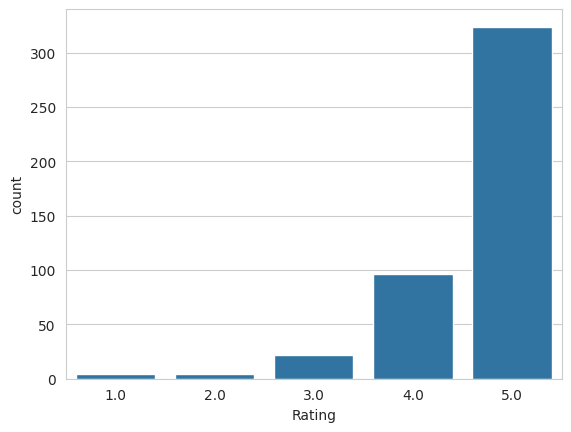

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum()}")
sns.countplot(x='Rating', data=df);

# Visualizing Word Clouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

# Word Cloud: Positive Reviews

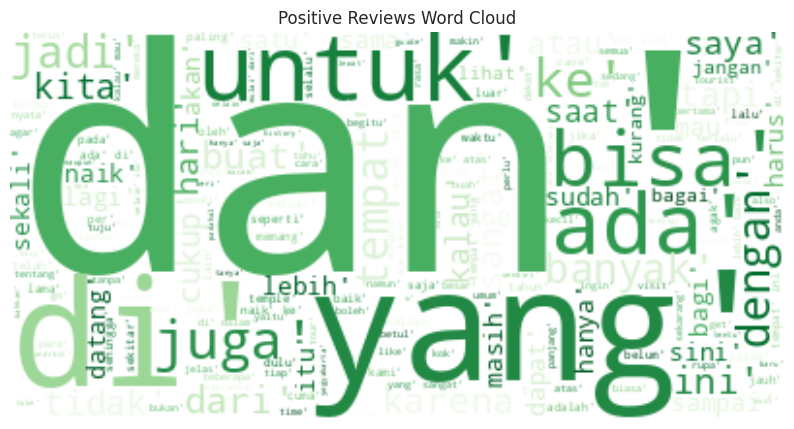

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()


# Word Cloud: Negative Reviews

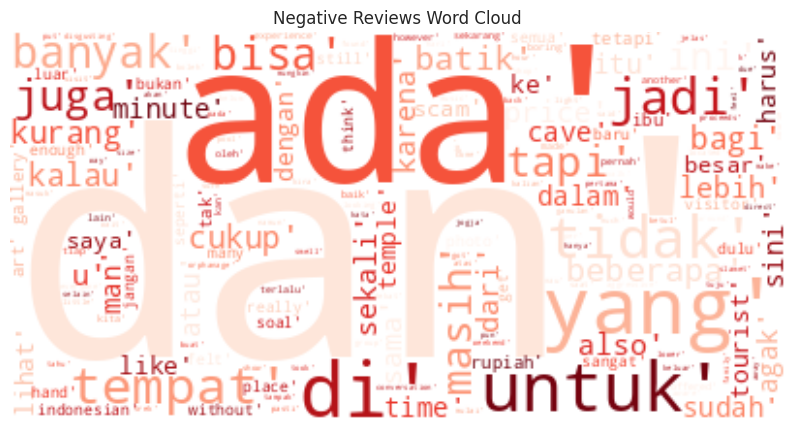

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# Feature Extraction from Text



*   Vectorizer : TF-IDF



In [ ]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(450, 3)
(450,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(315, 3)
(135, 3)
(315,)
(135,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Option 1: Unpack Lists (recommended)

X_train['text_for_vectorizer'] = X_train['lemmatized_review'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)
tfidf_train = tfidf.fit_transform(X_train['text_for_vectorizer'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])  # No change needed here

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
                          pd.DataFrame(tfidf_test.toarray())], axis=1)

# Option 2: Custom Preprocessor (more complex)

def custom_preprocessor(doc):
    if isinstance(doc, list):
        return ' '.join(doc)
    else:
        return doc

tfidf = TfidfVectorizer(preprocessor=custom_preprocessor, max_df=0.5, min_df=2)
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
                          pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

AttributeError: 'list' object has no attribute 'lower'